In [1]:
# load useful packages
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
## main cell type colours 
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

In [3]:
## other cell type colours 
col_Epen2 = '#c5b0d5'
col_P_Sert = '#8c564b'
col_U_Neur1 = '#ffbb78'
col_U_Neur2 = '#d62728'
col_U_Neur3 = '#c49c94'

In [4]:
## order cell types in a sensible way 
## by time point and relevance
ordering = c("FPP","P_FPP","NB","DA","Sert","P_Sert","Astro","Epen1","Epen2","U_Neur1","U_Neur2","U_Neur3")
cols = c(col_FPP,col_P_FPP,col_NB,col_DA,col_Sert,col_P_Sert,col_Astro,col_Epen1,col_Epen2,col_U_Neur1,col_U_Neur2,col_U_Neur3)

In [5]:
### Day 11
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,celltype,n_cells
HPSI0114i-eipl_1,pool1,D11,FPP,1672
HPSI0114i-eipl_1,pool1,D11,NB,228


In [6]:
df = myfile %>% group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
df$fractions = df$ncells/sum(df$ncells)
sum(df$fractions)
df

[1] 1

celltype,time_point,ncells,fractions
FPP,D11,136074,0.5370332
NB,D11,9973,0.0393597
P_FPP,D11,107334,0.4236071


In [7]:
df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,ncells,fractions,order
FPP,D11,136074,0.5370332,1
P_FPP,D11,107334,0.4236071,2
NB,D11,9973,0.0393597,3


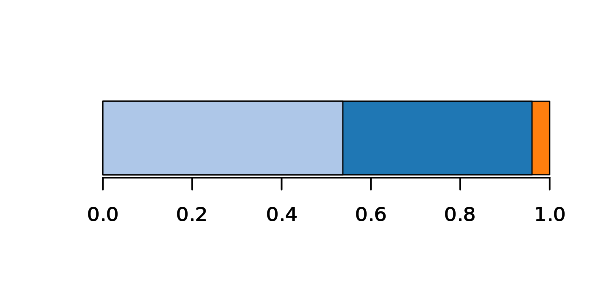

In [8]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[3], horiz = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[2], add = T, horiz = T)
barplot(df$fractions[1], col = cols[1], add = T, horiz = T) 

In [9]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"

In [14]:
pdf(paste0(fig_dir,"Fig1c_day11.pdf"), width=5, height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[3], horiz = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[2], add = T, horiz = T)
barplot(df$fractions[1], col = cols[1], add = T, horiz = T) 
dev.off()

png 
  2

In [15]:
## Day 30
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,celltype,n_cells
HPSI0114i-bezi_3,pool10,D30,Astro,62
HPSI0114i-bezi_3,pool10,D30,CHem,11


In [16]:
df = myfile %>% group_by(celltype,time_point) %>% summarise(ncells = sum(n_cells))
df$fractions = df$ncells/sum(df$ncells)
sum(df$fractions)
df

[1] 1

celltype,time_point,ncells,fractions
Astro,D30,58109,0.231581003
CHem,D30,21268,0.084759070
DA,D30,69007,0.275012653
Epen1,D30,28145,0.112165884
P_FPP,D30,18988,0.075672617
Sert,D30,53774,0.214304787
unknown,D30,1632,0.006503987


In [17]:
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "Astro"] <- "FPP"
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur2"

In [18]:
df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,ncells,fractions,order
FPP,D30,58109,0.231581003,1
P_FPP,D30,18988,0.075672617,2
DA,D30,69007,0.275012653,4
Sert,D30,53774,0.214304787,5
Epen1,D30,28145,0.112165884,8
U_Neur1,D30,21268,0.084759070,10
U_Neur2,D30,1632,0.006503987,11


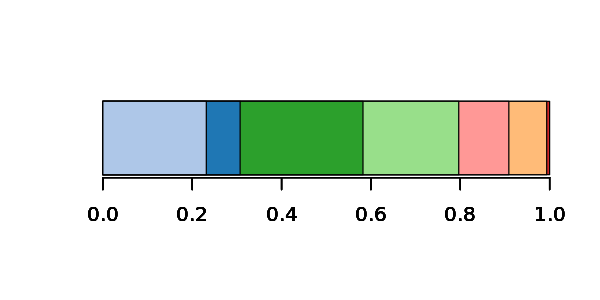

In [19]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 

In [20]:
pdf(paste0(fig_dir,"Fig1c_day30.pdf"), width=5, height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 
dev.off()

png 
  2

In [21]:
## Day 52
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5


In [22]:
df = myfile %>% group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))

In [23]:
## Day 52 untreated cells
df_NONE = df[df$treatment == 'NONE',]
df_NONE$fractions = df_NONE$ncells/sum(df_NONE$ncells)
df_NONE

celltype,time_point,treatment,ncells,fractions
Astro,D52,NONE,44059,0.144999605
CHem,D52,NONE,22674,0.074620873
DA,D52,NONE,54331,0.178805092
Epen1,D52,NONE,50084,0.164828076
Epen2,D52,NONE,1869,0.006150940
FPP,D52,NONE,34515,0.113589990
P_FPP,D52,NONE,15390,0.050648992
P_Sert,D52,NONE,1793,0.005900821
Sert,D52,NONE,74984,0.246774788
unknown,D52,NONE,4157,0.013680822


In [24]:
df = df_NONE
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"

df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,treatment,ncells,fractions,order
FPP,D52,NONE,34515,0.113589990,1
P_FPP,D52,NONE,15390,0.050648992,2
DA,D52,NONE,54331,0.178805092,4
Sert,D52,NONE,74984,0.246774788,5
P_Sert,D52,NONE,1793,0.005900821,6
Astro,D52,NONE,44059,0.144999605,7
Epen1,D52,NONE,50084,0.164828076,8
Epen2,D52,NONE,1869,0.006150940,9
U_Neur1,D52,NONE,22674,0.074620873,10
U_Neur3,D52,NONE,4157,0.013680822,12


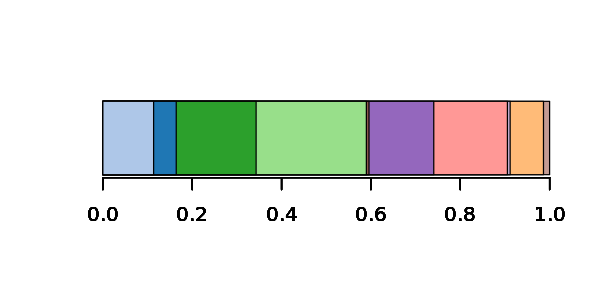

In [25]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9]+df$fractions[10], col = cols[df$order[10]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9], col = cols[df$order[9]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8], col = cols[df$order[8]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 

In [26]:
pdf(paste0(fig_dir,"Fig1c_day52_untreated.pdf"), width=5, height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9]+df$fractions[10], col = cols[df$order[10]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9], col = cols[df$order[9]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8], col = cols[df$order[8]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 
dev.off()

png 
  2

In [27]:
## load all day 52 counts again
df = myfile %>% group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))

In [28]:
## Day 52 ROT treated cells
df_ROT = df[df$treatment == 'ROT',]
df_ROT$fractions = df_ROT$ncells/sum(df_ROT$ncells)
df_ROT

celltype,time_point,treatment,ncells,fractions
Astro,D52,ROT,41392,0.188799387
CHem,D52,ROT,8694,0.039655534
DA,D52,ROT,25470,0.116175116
Epen1,D52,ROT,42063,0.191859988
Epen2,D52,ROT,1577,0.007193096
FPP,D52,ROT,31203,0.142324779
P_FPP,D52,ROT,9741,0.044431166
P_Sert,D52,ROT,780,0.003557777
Sert,D52,ROT,55225,0.251895201
unknown,D52,ROT,3093,0.014107956


In [29]:
df = df_ROT
df$celltype <- as.character(df$celltype)
df$celltype[df$celltype == "CHem"] <- "U_Neur1"
df$celltype[df$celltype == "unknown"] <- "U_Neur3"

df$order = c()
for (i in 1:length(ordering)){
    if (ordering[i] %in% df$celltype){
        df[df$celltype == ordering[i],'order'] <-  i
    }   
}

df = df[order(df$order),]
df

celltype,time_point,treatment,ncells,fractions,order
FPP,D52,ROT,31203,0.142324779,1
P_FPP,D52,ROT,9741,0.044431166,2
DA,D52,ROT,25470,0.116175116,4
Sert,D52,ROT,55225,0.251895201,5
P_Sert,D52,ROT,780,0.003557777,6
Astro,D52,ROT,41392,0.188799387,7
Epen1,D52,ROT,42063,0.191859988,8
Epen2,D52,ROT,1577,0.007193096,9
U_Neur1,D52,ROT,8694,0.039655534,10
U_Neur3,D52,ROT,3093,0.014107956,12


In [30]:
# options(repr.plot.width=5, repr.plot.height=5)
# barplot(df$fractions, col = cols[df$order], ylim = c(0,0.6))

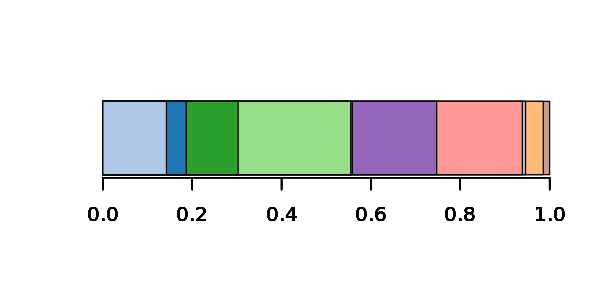

In [31]:
options(repr.plot.width=5, repr.plot.height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9]+df$fractions[10], col = cols[df$order[10]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9], col = cols[df$order[9]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8], col = cols[df$order[8]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 

In [32]:
pdf(paste0(fig_dir,"Fig1c_day52_ROT_treated.pdf"), width=5, height=2.5)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9]+df$fractions[10], col = cols[df$order[10]], horiz = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8]+df$fractions[9], col = cols[df$order[9]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7]+df$fractions[8], col = cols[df$order[8]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6]+df$fractions[7], col = cols[df$order[7]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5]+df$fractions[6], col = cols[df$order[6]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4]+df$fractions[5], col = cols[df$order[5]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3]+df$fractions[4], col = cols[df$order[4]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2]+df$fractions[3], col = cols[df$order[3]], horiz = T, add = T)
barplot(df$fractions[1]+df$fractions[2], col = cols[df$order[2]], add = T, horiz = T)
barplot(df$fractions[1], col = cols[df$order[1]], add = T, horiz = T) 
dev.off()

png 
  2

In [24]:
#### Fisher's exact test for loss of DA upon ROT stimulation at Day 52

In [25]:
## Day 52
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
myfile = read.table(myfilename, header = T)
head(myfile,2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,CHem,5


In [26]:
df = myfile %>% group_by(celltype,time_point,treatment) %>% summarise(ncells = sum(n_cells))

In [27]:
mat = matrix(0, nrow=2,ncol=2)
mat[1,1] = df[df$treatment == 'NONE' & df$celltype == 'DA',]$ncells
mat[1,2] = df[df$treatment == 'ROT' & df$celltype == 'DA',]$ncells
mat[2,1] = sum(df[df$treatment == 'NONE' & df$celltype != 'DA',]$ncells)
mat[2,2] = sum(df[df$treatment == 'ROT' & df$celltype != 'DA',]$ncells)
mat

54331,25470
249525,193768


In [28]:
fisher.test(mat)


	Fisher's Exact Test for Count Data

data:  mat
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.630161 1.683333
sample estimates:
odds ratio 
  1.656472 
